# **Conjunto de dados de flores de íris**

O conjunto de dados de flores Iris ou conjunto de dados Iris foi introduzido pelo estatístico, eugenista e biólogo britânico Ronald Fisher em seu artigo de 1936. O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor). Quatro características foram medidas em cada amostra: o comprimento e a largura das sepas e pétalas (em centímetros). Com base na combinação dessas quatro características, Fisher desenvolveu um **modelo discriminante linear** para distinguir as espécies umas das outras.

<table><tr>
    
<td> <img src="img/setosa.jpg" alt="Drawing" style="width: 180px;" title="iris-setosa"/> 
    <figcaption>iris-setosa.</figcaption>
    </td>
<td> <img src="img/virginica.jpg" alt="Drawing" style="width: 250px;" title="iris-virginica"/> 
    <figcaption>iris-virginica.</figcaption>
    </td>
<td> <img src="img/versicolor.jpg" alt="Drawing" style="width: 250px;" title="iris-versicolor"/>
    <figcaption>iris-versicolor.</figcaption>
    </td>
</tr></table>


Com base neste modelo, esse conjunto de dados se tornou um caso de teste típico para muitas técnicas de classificação estatística em Machine Learning.

---

## **Objetivo**

Prever, com base nas características dadas, o tipo de íris.

---

## **Obtenção dos dados**

Os dados foram obtidos do repositório [UCI Machine Learning](https://archive.ics.uci.edu/ml/index.php).


In [2]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Carregando Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)

In [4]:
print('Forma do conjunto de dados:',iris.shape)

Forma do conjunto de dados: (150, 5)


---

## **Exploração dos dados**

É importante, antes de qualquer análise mais específica ou cálculo, uma análise inicial das variáveis. Desta forma podemos verificar se possuem dados faltantes, amostras descrepantes (autliers) e a distribuição desses dados.

### **Dicionário de dados:**

* **sepal-lenght:** comprimento da sepa em cm
      
* **sepal-width:** largura da sepa em cm

* **petal-lenght:** comprimento da pétala em cm

* **petal-width:** largura da pétala em cm

* **class:** espécie de íris 

  * Iris Setosa
  * Iris Versicolour 
  * Iris Virginica
  
### **Tipos de cada variável:**

* Variáveis Numéricas
  * Discretas (Não possui)
  * Contínuas
     * Iris Setosa
     * Iris Versicolour
     * Iris Virginica
* Variáveis categórica
  * classes

In [5]:
# tipos de variáveis presentes
iris.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

In [6]:
# Visualizando os dados
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Distribuição estatística dos dados
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Distribuição de Classe**

Vamos agora dar uma olhada no número de linhas que pertencem a cada classe.

In [8]:
# class distribution
iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Podemos ver que cada classe tem o mesmo número de instâncias (50 ou 33% do conjunto de dados) como havia dito mo ínicio.

---

## **Visualização dos dados**

Uma boa visualização dos gráficos podem nos mostrar interações entre variáveis ou *outliers*.

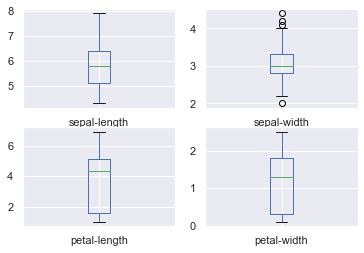

In [9]:
# box and whisker plots
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Note que temos a presença de valores descrepantes na variável ``sepal-width``.

Olhar para gráficos de dispersão de todos os pares de atributos pode nos ajudar a entender melhor os nossos dados.

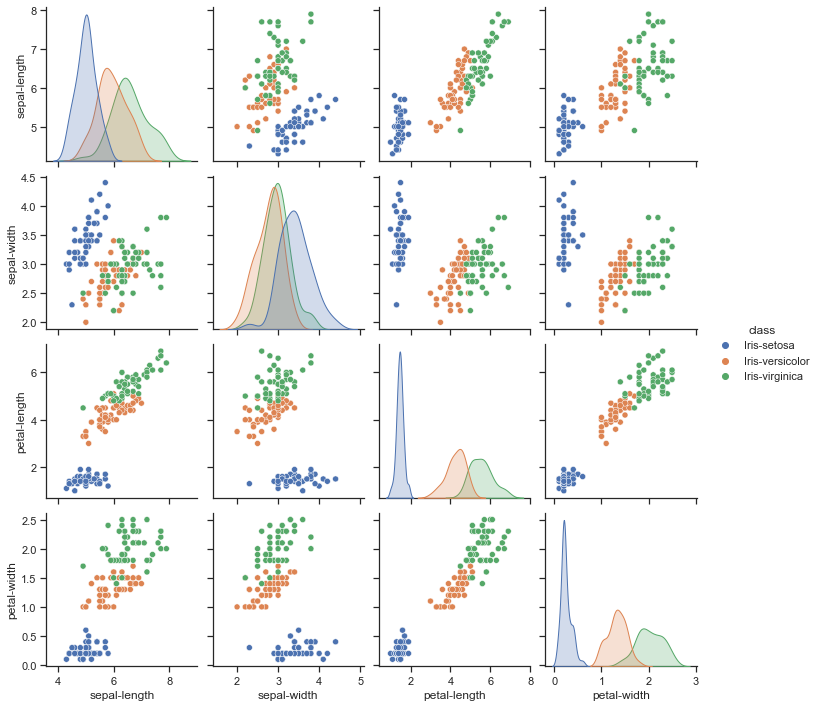

In [10]:
# scatter plot matrix
sns.set_theme(style="ticks")
sns.pairplot(iris, hue="class");

Observe o agrupamento diagonal de alguns pares de atributos. Isso sugere uma alta correlação e um relacionamento previsível.

---

## **Aplicar os nossos modelos de Machine Learning**

Aqui está o que vamos cobrir nesta etapa:

* Separa um conjunto de dados de validação.
* Construir um modelo para prever espécies a partir de medições de flores.
* Otimizar o nosso modelo.

### **Criação do conjunto de dados de validação**

Perceba que em nosso conjunto de dados a coluna de resposta não é numérica, precisamos que ela seja numérica para que póssamos usá-a em nosso modelo, neste caso iremos classificar os valores presentes nela:

* iris-setosa = 0
* iris-versicolor = 1
* iris-virginica = 2

Para isso usaremos o comando ``map``.

In [11]:
iris['class'] = iris['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [12]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Se você calcula a sua função custo usando o teste definido, sua estimativa será muito otimista e você lançará um sistema que não funcionar tão bem quanto o esperado. Devido isto vamos dividir o conjunto de dados de forma a termos 20\% dele reservados para validação.

In [13]:
#importando o pacote de divisão dos dados em treinamento e teste
from sklearn.model_selection import train_test_split

Agora podemos separar o nosso conjunto de dados:

In [14]:
#escolhendo as colunas do dataframe que serão nossos valores de entrada para o modelo
X = pd.DataFrame(columns=['sepal-length','sepal-width','petal-length','petal-width'],data=iris)

In [15]:
y = pd.DataFrame(columns=['class'], data=iris)

In [16]:
# dividindo os dados em treinamento e teste
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(len(X_train), "train X +", len(X_validation), "validation X")

120 train X + 30 validation X


In [18]:
print(len(y_train), "train y +", len(y_validation), "validation y")

120 train y + 30 validation y


Agora vamos contruir nosso modelo de Machine Learning. Note que temos dados de ordem bem mais alta que outros, vamos normalizá-los para usar em nosso modelo.

In [19]:
# normalizando os dados
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_validation = sc_X.transform(X_validation)

In [20]:
y_train.shape

(120, 1)

Com isso podemos ver os valores previstos.

In [21]:
# importando, configurando e treinando o modelo de regressão 
from sklearn.linear_model import LogisticRegression
sk_lr =LogisticRegression(solver='liblinear')
sk_lr.fit(X_train,np.ravel(y_train,order='C'))
y_pred=sk_lr.predict(X_validation)

Agora podemos observar os valores preditos:

In [22]:
#verificando os valores preditos
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

---

### **Calculando a matriz de confusão**

In [28]:
#importando o pacote de métricas e calculando a matriz de confusão
from sklearn import metrics
cnf_matrix =  metrics.confusion_matrix(y_validation, y_pred)

In [29]:
# métricas finais
print(metrics.classification_report(y_validation, y_pred, target_names=['0','1', '2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Após criar o modelo, vamos usá-lo e ver os resultados.

In [32]:
X_new = X_validation[1]
X_new

array([-0.13307079,  1.67028869, -1.16259727, -1.17620281])

O mais correto seria usar novas amostras para testar o nosso modelo, mas usarei o primeiro valor de ``X_validation``.

In [33]:
y_new = sk_lr.predict([X_new])
y_new

array([0])

Logo prevemos que essas amostras são de uma flor do tipo <font color='red'>**iris-setosa**</font>.